## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import DataFrame
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

## Read Data Set from CSV and Verify

In [2]:
med_df = pd.read_csv('medical_raw_data.csv')

## Exploration of Data: 

### What is the Shape of the DataFrame (Rows & Columns):

In [3]:
med_df.shape

(10000, 53)

### DataFrame Inspection: View Information (Data Types, Index, Column Count, Memory Usage): 

In [4]:
med_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

### Inspect Start and End of data:

In [5]:
med_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [6]:
med_df.tail()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3
9999,10000,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,...,8700.856021,11643.189930,4,3,3,2,3,6,4,3


## Detect Missing Data: 

#### Check if Rows Have Data or Not (True if NA, Nulls, NaN):

In [7]:
med_df.isnull().any()

Unnamed: 0            False
CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children               True
Age                    True
Education             False
Employment            False
Income                 True
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink             True
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight             True
Arthritis             False
Diabetes              False
Hyperlipidemia      

#### How Many NaNs

In [8]:
med_df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

#### List Only Columns Containing At Least One Null

In [9]:
med_df.loc[:, med_df.isnull().any()]

,Children,Age,Income,Soft_drink,Overweight,Anxiety,Initial_days
0,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
1,3.0,51.0,46805.99,No,1.0,NaN,15.129562
2,3.0,53.0,14370.14,No,1.0,NaN,4.772177
3,0.0,78.0,39741.49,No,0.0,NaN,1.714879
4,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807
...,...,...,...,...,...,...,...
9995,NaN,25.0,45967.61,No,NaN,1.0,51.561217
9996,4.0,87.0,14983.02,No,1.0,0.0,68.668237
9997,3.0,NaN,65917.81,Yes,1.0,1.0,NaN
9998,3.0,43.0,29702.32,No,1.0,0.0,63.356903


#### Any Rows with All Nulls?

In [10]:
med_df.isnull().all(axis=1).any()

False

In [11]:
med_df[med_df.isnull().all(axis=1)]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


### Fill Missing Values and Verify

In [12]:
med_df[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']]=med_df[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']].fillna(med_df.mean())

In [13]:
rows_to_fill = med_df.isnull().any(axis=1)
med_df[rows_to_fill]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
6,7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,...,3533.292197,16815.513600,4,3,3,2,3,4,5,5
7,8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,...,3316.400250,6930.572138,1,2,2,5,4,2,4,2
14,15,15,T490287,19caf80a-cdc4-43a7-890d-72b07a62e5be,fa79d3f149c5ff752044070cb272ef15,Sioux Center,IA,Sioux,51250,43.08426,...,2330.422557,14382.229260,4,5,5,4,5,3,3,5
17,18,18,I745784,c173d889-8d12-4375-819e-cd83902c9de8,a8437eadfb17988b7d7fedcc0468664e,Matthews,IN,Grant,46957,40.38836,...,2631.702104,9539.219271,4,4,3,5,2,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9972,9972,K874758,56095044-286a-4d65-8347-bfd5680a1fa9,c313d637cdbbfd6d3e27834ab8d42c1d,Stratford,CA,Kings,93266,36.15725,...,6842.784074,9605.539227,4,4,3,4,4,5,2,4
9972,9973,9973,S844348,88acd37d-32ef-4f18-93ca-15a664434831,b814097a631fd103ed32b26acf5e197a,East Lynn,WV,Wayne,25512,38.18654,...,7595.974147,4576.671669,5,4,5,4,4,3,4,2
9978,9979,9979,H473893,4b74a424-6103-4832-a0a2-b30d8b4745a3,c567f98ea642877676097db385830908,Fairmont,NC,Robeson,28340,34.47200,...,5090.394760,13712.420750,3,2,3,2,5,2,1,4
9982,9983,9983,O64996,07ffe436-a1a2-4b37-96b0-2602ffb1ad6f,b0df4c12776c7d9efceb9fcc67d0262e,Atlantic City,NJ,Atlantic,8401,39.37961,...,7362.127913,16233.041630,4,4,5,5,3,3,3,3


#### Fill Missing Data With Mean

#### Backfill Soft Drink Series

In [14]:
med_df[['Soft_drink']] = med_df[['Soft_drink']].fillna(method='bfill')

#### Verify Missing Values Filled

In [15]:
med_df.loc[:, med_df.isnull().any()]

""
0
1
2
3
4
...
9995
9996
9997
9998


#### Verify Nulls are Filled (Different Way)

In [16]:
med_df[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Children      10000 non-null  float64
 1   Age           10000 non-null  float64
 2   Income        10000 non-null  float64
 3   Soft_drink    10000 non-null  object 
 4   Overweight    10000 non-null  float64
 5   Anxiety       10000 non-null  float64
 6   Initial_days  10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [17]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

### Delete Redundant Column

In [18]:
med_df.drop(columns='Unnamed: 0', inplace=True)
med_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


### Using Boxplots to Help Detect Outliers

<AxesSubplot:>

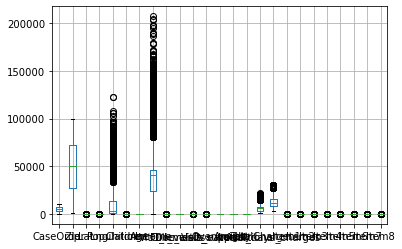

In [19]:
med_df.boxplot()

count    10000.000000
mean         2.098219
std          1.855638
min          0.000000
25%          1.000000
50%          2.098219
75%          3.000000
max         10.000000
Name: Children, dtype: float64

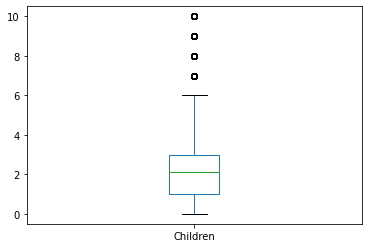

In [20]:
Children_bp = med_df['Children']
Children_bp.plot.box()
Children_bp.describe()

In [21]:
q1 = Children_bp.quantile(.25)
q3 = Children_bp.quantile(.75)
# set interquartile range 
iqr = q3 - q1
# position whiskers
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
# Replace outliers w/NaNs rather than remove the whole row
children_mean = Children_bp.where(Children_bp.between(pmin, pmax), Children_bp.mean())
children_mode = Children_bp.where(Children_bp.between(pmin, pmax), Children_bp.mode())
new_children = Children_bp.where(Children_bp.between(pmin, pmax))

,before,NaN,mean,mode
count,10000.000000,9543.000000,10000.000000,9543.000000
mean,2.098219,1.809828,1.823008,1.809828
std,1.855638,1.318207,1.289138,1.318207
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.098219,2.000000,2.098219,2.000000
75%,3.000000,2.098219,2.098219,2.098219
max,10.000000,6.000000,6.000000,6.000000


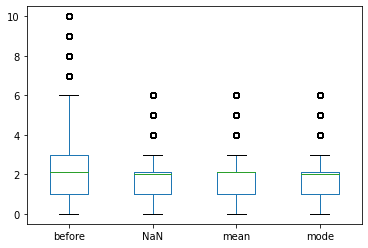

In [22]:
compare = pd.DataFrame({'before':Children_bp, 'NaN':new_children, 'mean':children_mean, 'mode':children_mode})
compare.plot.box()
compare.describe()

count    10000.000000
mean        53.295676
std         17.993375
min         18.000000
25%         41.000000
50%         53.295676
75%         65.000000
max         89.000000
Name: Age, dtype: float64

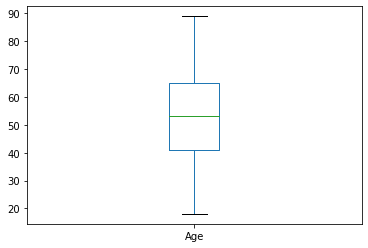

In [23]:
Age_bp = med_df['Age']
Age_bp.plot.box()
Age_bp.describe()

In [24]:
q1 = Age_bp.quantile(.25)
q3 = Age_bp.quantile(.75)
# set interquartile range 
iqr = q3 - q1
# position whiskers
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
# Replace outliers w/NaNs rather than remove the whole row
age_mean = Age_bp.where(Age_bp.between(pmin, pmax), Age_bp.mean())
age_mode = Age_bp.where(Age_bp.between(pmin, pmax), Age_bp.mode())
new_age = Age_bp.where(Age_bp.between(pmin, pmax))

,before,NaN,mean,mode
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.295676,53.295676,53.295676,53.295676
std,17.993375,17.993375,17.993375,17.993375
min,18.000000,18.000000,18.000000,18.000000
25%,41.000000,41.000000,41.000000,41.000000
50%,53.295676,53.295676,53.295676,53.295676
75%,65.000000,65.000000,65.000000,65.000000
max,89.000000,89.000000,89.000000,89.000000


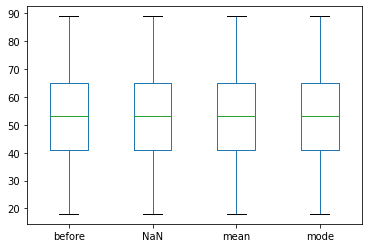

In [25]:
compare = pd.DataFrame({'before':Age_bp, 'NaN':new_age, 'mean':age_mean, 'mode':age_mode})
compare.plot.box()
compare.describe()

count     10000.000000
mean      40484.438268
std       24883.598484
min         154.080000
25%       23956.162500
50%       40484.438268
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64

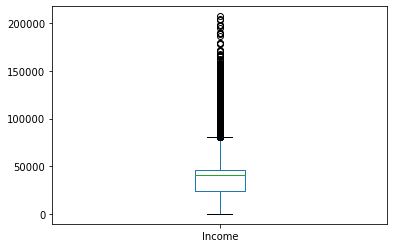

In [26]:
Income_bp = med_df['Income']
Income_bp.plot.box()
Income_bp.describe()

In [27]:
q1 = Income_bp.quantile(.25)
q3 = Income_bp.quantile(.75)
# set interquartile range 
iqr = q3 - q1
# position whiskers
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
# Replace outliers w/NaNs rather than remove the whole row
income_mean = Income_bp.where(Income_bp.between(pmin, pmax), Income_bp.mean())
income_mode = Income_bp.where(Income_bp.between(pmin, pmax), Income_bp.mode())
new_income = Income_bp.where(Income_bp.between(pmin, pmax))

,before,mean,mode,NaN
count,10000.000000,10000.000000,9296.000000,9295.000000
mean,40484.438268,35929.372906,35584.410986,35583.883817
std,24883.598484,16236.721721,16790.114828,16790.941144
min,154.080000,154.080000,154.080000,154.080000
25%,23956.162500,23956.162500,22723.502500,22721.725000
50%,40484.438268,40484.438268,40484.438268,40484.438268
75%,46466.797500,40484.438268,40682.117500,40697.915000
max,207249.130000,80229.880000,80229.880000,80229.880000


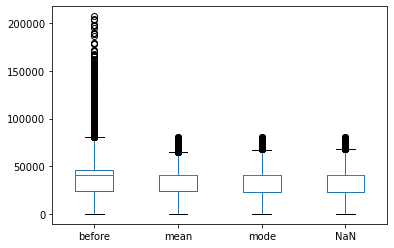

In [28]:
compare = pd.DataFrame({'before':Income_bp, 'mean':income_mean, 'mode':income_mode, 'NaN':new_income})
compare.plot.box()
compare.describe()

count    10000.000000
mean        34.432082
std         24.860232
min          1.001981
25%          8.928987
50%         34.432082
75%         59.459981
max         71.981486
Name: Initial_days, dtype: float64

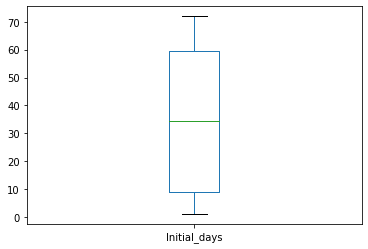

In [29]:
Initial_days_bp = med_df['Initial_days']
Initial_days_bp.plot.box()
Initial_days_bp.describe()

In [30]:
q1 = Initial_days_bp.quantile(.25)
q3 = Initial_days_bp.quantile(.75)
# set interquartile range 
iqr = q3 - q1
# position whiskers
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
# Replace outliers w/NaNs rather than remove the whole row
initial_days_mean = Initial_days_bp.where(Initial_days_bp.between(pmin, pmax), Initial_days_bp.mean())
initial_days_mode = Initial_days_bp.where(Initial_days_bp.between(pmin, pmax), Initial_days_bp.mode())
new_initial_days = Initial_days_bp.where(Initial_days_bp.between(pmin, pmax))

,before,mean,mode,NaN
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.432082,34.432082,34.432082,34.432082
std,24.860232,24.860232,24.860232,24.860232
min,1.001981,1.001981,1.001981,1.001981
25%,8.928987,8.928987,8.928987,8.928987
50%,34.432082,34.432082,34.432082,34.432082
75%,59.459981,59.459981,59.459981,59.459981
max,71.981486,71.981486,71.981486,71.981486


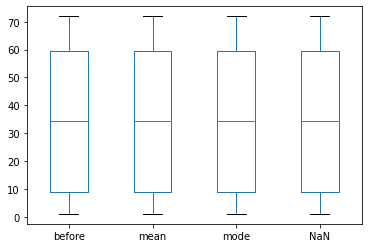

In [31]:
compare = pd.DataFrame({'before':Initial_days_bp, 'mean':initial_days_mean, 'mode':initial_days_mode, 'NaN':new_initial_days})
compare.plot.box()
compare.describe()

#### Save Changes Perminant 

,Children,C_mean,Age,A_mean,Income,I_mean,Initial_days,ID_mean
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.098219,1.823008,53.295676,53.295676,40484.438268,35929.372906,34.432082,34.432082
std,1.855638,1.289138,17.993375,17.993375,24883.598484,16236.721721,24.860232,24.860232
min,0.000000,0.000000,18.000000,18.000000,154.080000,154.080000,1.001981,1.001981
25%,1.000000,1.000000,41.000000,41.000000,23956.162500,23956.162500,8.928987,8.928987
50%,2.098219,2.098219,53.295676,53.295676,40484.438268,40484.438268,34.432082,34.432082
75%,3.000000,2.098219,65.000000,65.000000,46466.797500,40484.438268,59.459981,59.459981
max,10.000000,6.000000,89.000000,89.000000,207249.130000,80229.880000,71.981486,71.981486


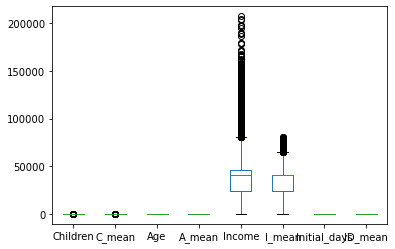

In [32]:
compare = pd.DataFrame({'Children':med_df['Children'], 'C_mean':children_mean, 'Age':med_df['Age'], 'A_mean':age_mean, 'Income':med_df['Income'], 'I_mean':income_mean, 'Initial_days':med_df['Initial_days'], 'ID_mean':initial_days_mean})
compare.plot.box()
compare.describe()

In [33]:
med_df['Children'].mean()

2.0982191041553473

In [34]:
med_df['Children'] = children_mean

In [35]:
med_df['Children'].mean()

1.8230077172152483

In [36]:
med_df['Children'].where(Children_bp.between(pmin, pmax), med_df['Children'].mean())
med_df['Children'].mean()

1.8230077172152483

In [37]:
med_df['Children'] = children_mean
med_df['Age'] = age_mean
med_df['Income'] = income_mean
med_df['Initial_days'] = initial_days_mean

,Children,Age,Income,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.823008,53.295676,35929.372906,34.432082
std,1.289138,17.993375,16236.721721,24.860232
min,0.000000,18.000000,154.080000,1.001981
25%,1.000000,41.000000,23956.162500,8.928987
50%,2.098219,53.295676,40484.438268,34.432082
75%,2.098219,65.000000,40484.438268,59.459981
max,6.000000,89.000000,80229.880000,71.981486


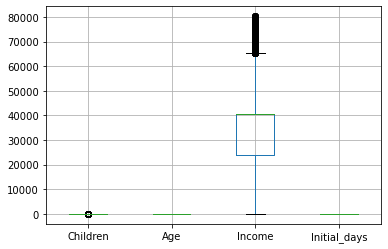

In [38]:
med_df[['Children', 'Age', 'Income', 'Initial_days']].boxplot()
med_df[['Children', 'Age', 'Income', 'Initial_days']].describe()

count    10000.000000
mean     35929.372906
std      16236.721721
min        154.080000
25%      23956.162500
50%      40484.438268
75%      40484.438268
max      80229.880000
Name: Income, dtype: float64

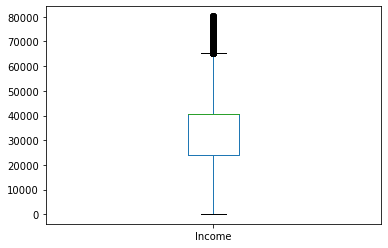

In [39]:
Income_bp = med_df['Income']
Income_bp.plot.box()
Income_bp.describe()

In [40]:
med_df.duplicated().any()

False

#### Verify Range and Series Counts All Match

In [41]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Educa

## Converting Data Types

In [42]:
med_df[['Overweight', 'Anxiety']].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Overweight  10000 non-null  float64
 1   Anxiety     10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [43]:
med_df[['Overweight', 'Anxiety']] = med_df[['Overweight', 'Anxiety']].astype(object)

In [44]:
med_df[['Overweight', 'Anxiety']].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Overweight  10000 non-null  object
 1   Anxiety     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


## Fixing Indices

#### Check if UID has any duplicates:

In [45]:
med_df[med_df.duplicated('UID')]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [46]:
med_df.set_index('UID', drop=True, inplace=True)
med_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
UID,,,,,,,,,,,,,,,,,,,,,
3a83ddb66e2ae73798bdf1d705dc0932,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
176354c5eef714957d486009feabf195,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
e19a0fa00aeda885b8a436757e889bc9,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
cd17d7b6d152cb6f23957346d11c3f07,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
d2f0425877b10ed6bb381f3e2579424a,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


#### Rename Some Column Headers for Consistancy

In [47]:
med_df.rename(
    columns={"CaseOrder": "Case_order", "HighBlood": "High_blood", "BackPain": "Back_pain","TotalCharge": "Total_charge", "Item1": "Timely_admission", "Item2": "Timely_treatment", "Item3": "Timely_visits", "Item4": "Reliability", "Item5": "Options", "Item6": "Hours_of_treatment", "Item7": "Courteous_staff", "Item8": "Active_listening_evidence_from_dr"},
    inplace=True)
med_df.head()

,Case_order,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Active_listening_evidence_from_dr
UID,,,,,,,,,,,,,,,,,,,,,
3a83ddb66e2ae73798bdf1d705dc0932,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
176354c5eef714957d486009feabf195,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
e19a0fa00aeda885b8a436757e889bc9,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
cd17d7b6d152cb6f23957346d11c3f07,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
d2f0425877b10ed6bb381f3e2579424a,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


## PCA: Use Only Series with Int and Float Data Types

In [48]:
med_df = med_df[['Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'Total_charge', 'Additional_charges', 'Timely_admission', 'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 'Courteous_staff', 'Active_listening_evidence_from_dr']]

In [49]:
med_df.head()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Active_listening_evidence_from_dr
UID,,,,,,,,,,,,,,,,,,,,,
3a83ddb66e2ae73798bdf1d705dc0932,35621,34.34960,-86.72508,2951,1.000000,53.0,40484.438268,17.802330,6,0,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
176354c5eef714957d486009feabf195,32446,30.84513,-85.22907,11303,3.000000,51.0,46805.990000,18.994640,4,2,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
e19a0fa00aeda885b8a436757e889bc9,57110,43.54321,-96.63772,17125,3.000000,53.0,14370.140000,17.415889,4,1,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
cd17d7b6d152cb6f23957346d11c3f07,56072,43.89744,-93.51479,2162,0.000000,78.0,39741.490000,17.420079,4,1,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
d2f0425877b10ed6bb381f3e2579424a,23181,37.59894,-76.88958,5287,2.098219,22.0,1209.560000,16.870524,5,0,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


### Verify Data Set Contains Numbers and NaNs Removed

In [50]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3a83ddb66e2ae73798bdf1d705dc0932 to 95663a202338000abdf7e09311c2a8a1
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zip                                10000 non-null  int64  
 1   Lat                                10000 non-null  float64
 2   Lng                                10000 non-null  float64
 3   Population                         10000 non-null  int64  
 4   Children                           10000 non-null  float64
 5   Age                                10000 non-null  float64
 6   Income                             10000 non-null  float64
 7   VitD_levels                        10000 non-null  float64
 8   Doc_visits                         10000 non-null  int64  
 9   Full_meals_eaten                   10000 non-null  int64  
 10  VitD_supp                          10000 non-null  int64  
 11  I

### Normalize the Data

In [51]:
med_df_normalized = (med_df - med_df.mean()) / med_df.std()

#### Import

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

### Choose Number of Components to Extract

In [53]:
pca = PCA(n_components = med_df.shape[1])

### Call PCA Application and Create New Data Set of Components

In [54]:
pca.fit(med_df_normalized)
med_df_pca = pd.DataFrame(pca.transform(med_df_normalized),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'])

### Create Scree Plot

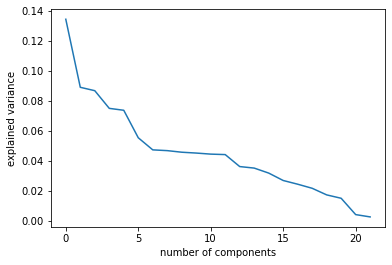

In [55]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [56]:
cov_matrix=np.dot(med_df_normalized.T, med_df_normalized) / med_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

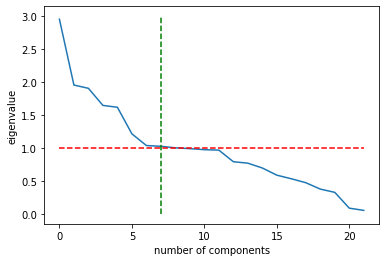

In [57]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
# draw horizontal line @1
x_coordinates = [0, 21]
y_coordinates = [1, 1]
# draw vertical line @7
x_horizontal = [7,7]
y_horizontal = [0,3]
plt.plot(x_coordinates, y_coordinates, 'r--', x_horizontal, y_horizontal, 'g--')
plt.show()

#### Display PCA

In [58]:
loadings = pd.DataFrame(pca.components_.T,
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'],
            index=med_df.columns)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Zip,-0.009220,0.086436,0.696792,-0.020780,0.024908,0.055877,0.011011,-0.000163,-0.000280,0.010158,...,-0.116193,0.009127,-0.013300,-0.001869,-0.000450,0.005859,-0.001616,-0.010806,-0.698542,0.022671
Lat,0.008947,-0.015955,0.059795,0.008107,-0.002409,-0.699485,-0.146564,-0.012704,-0.007317,-0.061000,...,0.675588,-0.025979,0.085712,-0.025889,0.014863,-0.001484,-0.014314,-0.007155,-0.115351,0.002949
Lng,0.004891,-0.087058,-0.701363,0.017842,-0.020689,0.033878,0.000638,-0.002261,0.002832,0.001468,...,-0.022747,-0.005864,-0.007955,0.007203,0.004629,0.005977,0.006880,-0.006032,-0.704651,0.023908
Population,0.009052,0.028359,0.033643,0.023195,-0.023036,0.695287,0.047750,-0.004605,-0.016700,-0.056496,...,0.704587,-0.012113,0.086016,-0.019453,-0.016106,-0.025765,-0.013844,-0.006916,-0.027551,-0.000850
Children,0.011703,0.009158,-0.007928,-0.021050,-0.016519,0.011484,-0.274797,0.464181,-0.613364,0.071009,...,-0.023648,0.031118,-0.008804,0.021563,-0.001974,-0.011795,-0.007466,-0.003795,-0.001222,-0.005269
Age,0.000474,0.079126,-0.038190,-0.014262,0.700224,0.011495,-0.023100,0.024471,0.006297,0.001021,...,-0.005927,-0.000873,0.023686,-0.004823,0.032007,-0.058399,-0.701299,-0.050004,-0.000240,-0.016643
Income,-0.009636,0.001964,0.005742,-0.009935,-0.006487,0.027342,-0.194617,-0.509968,-0.401373,0.676395,...,0.039259,-0.088571,-0.003892,-0.018287,-0.020164,0.009456,-0.022905,-0.006327,0.003952,-0.000776
VitD_levels,-0.009552,0.532145,-0.073932,0.053899,-0.051998,-0.072988,0.357024,-0.257373,-0.030675,0.068823,...,0.007765,-0.007208,-0.008287,-0.003667,-0.007810,0.009934,-0.024789,0.009590,0.012783,0.543912
Doc_visits,0.007119,-0.004071,0.001414,-0.007525,0.012581,0.016025,-0.071275,-0.464109,-0.499106,-0.711890,...,-0.079372,-0.012829,0.021971,-0.024173,0.008577,-0.010674,-0.003326,-0.001860,0.002573,-0.000249
Full_meals_eaten,-0.000683,-0.008814,0.020089,0.018374,0.038828,-0.104522,0.598935,0.091294,-0.107838,-0.001131,...,0.071578,0.056681,0.041556,-0.012913,0.000686,0.014024,-0.010513,0.000464,-0.001945,-0.001411


### PCAs to Keep

#### Extract 7 PCA Components

In [59]:
pca_keep = PCA(n_components = 7)

### Call PCA Application and Create New PCAs to Keep Display

In [60]:
pca_keep.fit(med_df_normalized)
med_df_pca_keep = pd.DataFrame(pca_keep.transform(med_df_normalized),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [61]:
loadings = pd.DataFrame(pca_keep.components_.T,
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
            index=med_df.columns)

#Styling - Create heatmap
cm = sns.light_palette("green", as_cmap=True)

s = loadings.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
s

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Zip,-0.009218,0.086428,0.696807,-0.020935,0.024990,0.055194,0.011937
Lat,0.008932,-0.016105,0.059692,0.009252,-0.002861,-0.695218,-0.151848
Lng,0.004892,-0.087028,-0.701363,0.017822,-0.020701,0.033837,0.000666
Population,0.009041,0.028258,0.033575,0.023875,-0.023318,0.700064,0.039074
Children,0.011701,0.009131,-0.007945,-0.020901,-0.016560,0.012665,-0.276006
Age,0.000482,0.078910,-0.038246,-0.014467,0.700740,0.008555,-0.018604
Income,-0.009642,0.001886,0.005692,-0.009446,-0.006661,0.030665,-0.218962
VitD_levels,-0.009556,0.532095,-0.073947,0.054189,-0.052159,-0.070741,0.347688
Doc_visits,0.007122,-0.004047,0.001432,-0.007716,0.012664,0.015285,-0.080564
Full_meals_eaten,-0.000688,-0.008858,0.020057,0.018796,0.038655,-0.102005,0.596989


#### Export Cleaned Data

In [62]:
med_df.to_csv('medical_raw_cleaned.csv')